# Modelling Employee Turnover

## 1. Loading the Data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [49]:
# Read in the data
df = pd.DataFrame.from_csv('HR_comma_sep.csv', index_col=None)

In [50]:
# Check to see if we read the data correctly
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Cleaning the Data

In [51]:
# Check if there are any missing values
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [52]:
# Rename the columns to make it easier to read
df = df.rename(columns={'satisfaction_level': 'satisfaction',
                       'last_evaluation': 'evaluation',
                       'number_project': 'projectCount',
                       'average_montly_hours': 'averageMonthlyHours',
                       'time_spend_company': 'yearsAtCompany',
                       'Work_accident': 'workAccident',
                       'promotion_last_5years': 'promotion',
                       'sales': 'department',
                       'left': 'turnover'})

In [53]:
# Move the the response variable to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1, inplace=True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


## 3. Exploratory Data Analysis


### 3.1 Overview

In [54]:
# Work out the shape of the data
# We have about 15,000 records
df.shape

(14999, 10)

In [55]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

In [56]:
# Lets work out the turnover rate
# Looks like its about 76.2%
turnover_rate = df.turnover.value_counts() / len(df)
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [57]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [58]:
# Compare the mean based on whether someone left the company or not
# We find that people who left the company are less satisfied, worked on more projects, 
# worked more hours, worked longer at the company and had less promotions
turnover_summary = df.groupby('turnover')
turnover_summary.mean().round(2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


### 3.2 Correlation

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.00,-0.39,0.01,0.02,0.07,0.14,-0.15,-0.06
satisfaction,-0.39,1.00,0.11,-0.14,-0.02,-0.10,0.06,0.03
evaluation,0.01,0.11,1.00,0.35,0.34,0.13,-0.01,-0.01
projectCount,0.02,-0.14,0.35,1.00,0.42,0.20,-0.00,-0.01
averageMonthlyHours,0.07,-0.02,0.34,0.42,1.00,0.13,-0.01,-0.00
yearsAtCompany,0.14,-0.10,0.13,0.20,0.13,1.00,0.00,0.07
workAccident,-0.15,0.06,-0.01,-0.00,-0.01,0.00,1.00,0.04
promotion,-0.06,0.03,-0.01,-0.01,-0.00,0.07,0.04,1.00


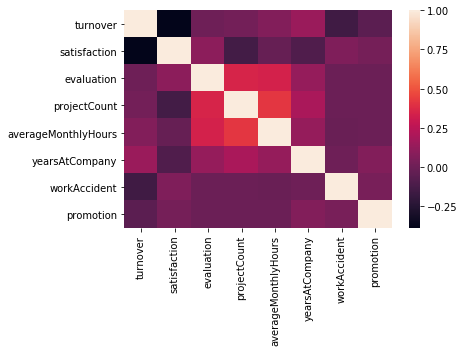

In [59]:
corr = df.corr()
corr = (corr)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
corr.round(2)

** Moderate Positively Correlated Features **
* projectCount and averageMonthlyHours 0.42
* evaluation and projectCount 0.35
* evaluation and averageMonthlyHours 0.34

** Moderate Negatively Correlated Features **
* satisfaction and turnover -0.39

Additionally, it appears there is no multicollinearity in the data.

### 3.3 Distribution Plots

Text(0,0.5,'Employee Count')

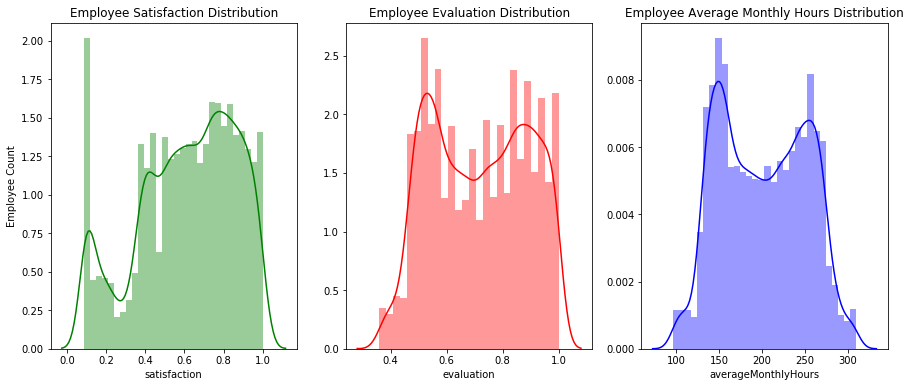

In [46]:
f, axes = plt.subplots(ncols=3, figsize=(15,6))

# Employee Satisfaction
sns.distplot(df.satisfaction, kde=True, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Employee Evaluation
sns.distplot(df.evaluation, kde=True, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[0].set_ylabel('Employee Count')

# Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=True, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[0].set_ylabel('Employee Count')
 

** Satisfaction **
* Large peak for very low satisfaction and then another for relatively large values. Indicated employees are either deeply unhappy or quite content. 

** Evaluation **
* Bimodal

** Average Monthly Hours **
* Bimodal

### 3.4 Salary vs Turnover

Text(0.5,1,'Employee Salary Turnover Count Plot')

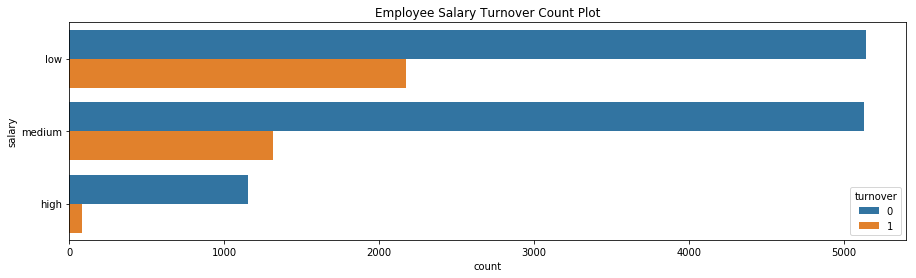

In [61]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue="turnover", data=df).set_title('Employee Salary Turnover Count Plot')

** Summary **
* It appears that there is much more turnover for employees with low and medium salaries in turns of magnitude and percentage

Text(0.5,1,'Employee Department Turnover Count Plot')

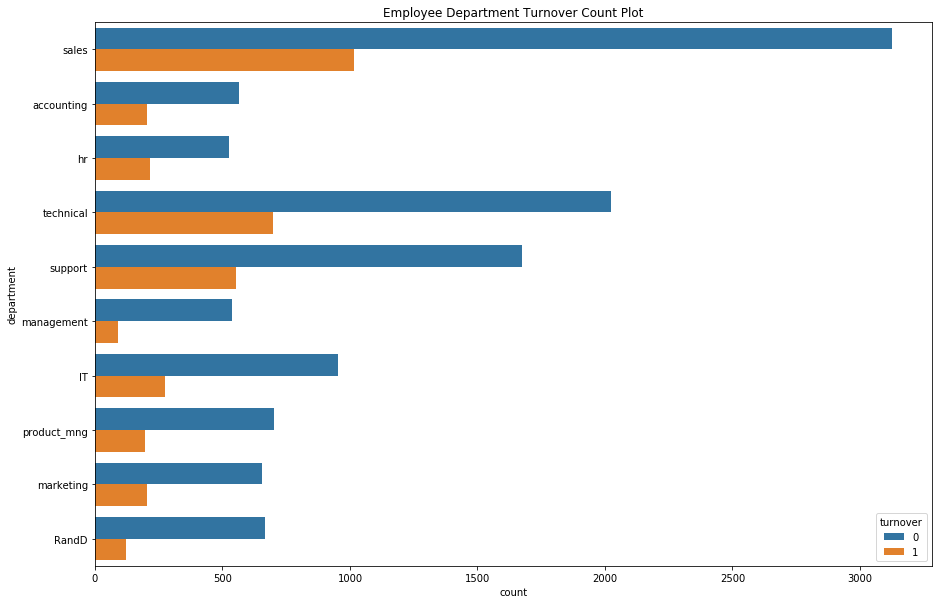

In [63]:
### 3.5 Department vs Turnover
f, ax = plt.subplots(figsize=(15,10))
sns.countplot(y="department", hue="turnover", data=df).set_title('Employee Department Turnover Count Plot')

** Top 3 (Magnitude) Turnover **
1. Sales
2. Technical
3. Support

** Bottom 3 (Magnitude) Turnover **
1. Management
2. R&D
3. Product Management